In [137]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}
mpl.rc('font', **font)

In [41]:
df = pd.read_csv("./bases/education/EdStatsAjustado.csv")

In [164]:
dfEducationGDP = df[df.IndicatorCode.isin(['SE.XPD.TOTL.GD.ZS'])]
dfEducationGDP = dfEducationGDP[['CountryCode','IndicatorCode','Year','Value']].copy()
dfEducationGDP = dfEducationGDP.pivot_table(index=['CountryCode','Year'], columns='IndicatorCode', dropna=False)
dfEducationGDP.columns = dfEducationGDP.columns.droplevel().rename(None)
dfEducationGDP = dfEducationGDP.reset_index()
dfEducationGDP.rename(columns={'Year':'year','CountryCode':'countrycode'},inplace=True)


In [174]:
dfMasculino = pd.read_csv("./bases/suicide/suicidioMasculino.csv")
dfFeminino = pd.read_csv("./bases/suicide/suicidiofeminino.csv")


In [180]:
dfEducation = pd.merge(dfMasculino,dfFeminino, on=['country','year','countrycode'])[['country','year','suicidio514_x', 'suicidio514_y','countrycode']]
dfEducation = pd.merge(dfEducation, dfEducationGDP, on=['countrycode','year'])
dfEducation.rename(columns={'suicidio514_x':'Masculino', 'suicidio514_y':'Feminino'},inplace=True)
dfEducation

,country,year,Masculino,Feminino,countrycode,SE.XPD.TOTL.GD.ZS
0,Albania,2000,0.266738,0.000000,ALB,3.28719
1,Albania,2001,1.865927,0.650711,ALB,3.34271
2,Albania,2002,0.313015,0.328030,ALB,3.05522
3,Albania,2003,1.277123,0.000000,ALB,3.06470
4,Albania,2004,0.330927,1.046372,ALB,3.17017
5,Albania,2005,0.000000,0.000000,ALB,3.23791
6,Albania,2006,0.000000,0.000000,ALB,3.15794
7,Albania,2007,1.467906,0.000000,ALB,3.26756
8,Albania,2008,2.667032,0.406029,ALB,NaN
9,Albania,2009,0.000000,0.000000,ALB,NaN


In [181]:
dfcorr = pd.DataFrame(columns=['country','Masculino', 'Feminino'])

for name, group in dfEducation.groupby('country'):
    a = group['Masculino'].corr(group['SE.XPD.TOTL.GD.ZS'])
    b = group['Feminino'].corr(group['SE.XPD.TOTL.GD.ZS'])
    dfcorr = dfcorr.append(pd.Series([name,a,b], index=dfcorr.columns ),ignore_index=True)

dfcorr = dfcorr.melt(id_vars=["country"], 
        var_name="nome",
        value_name="correlacao")

dfcorr.rename(columns={'nome':'Suicídios infantis(5-14)', 'correlacao':'Desp. em educação pelo PIB(%)'},inplace=True)
dfcorr

/home/heitor/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/heitor/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,country,Suicídios infantis(5-14),Desp. em educação pelo PIB(%)
0,Albania,Masculino,-0.043211
1,Antigua and Barbuda,Masculino,NaN
2,Argentina,Masculino,-0.559917
3,Armenia,Masculino,-0.064336
4,Aruba,Masculino,NaN
5,Australia,Masculino,0.071196
6,Austria,Masculino,0.250495
7,Bahamas,Masculino,NaN
8,Bahrain,Masculino,NaN
9,Barbados,Masculino,NaN


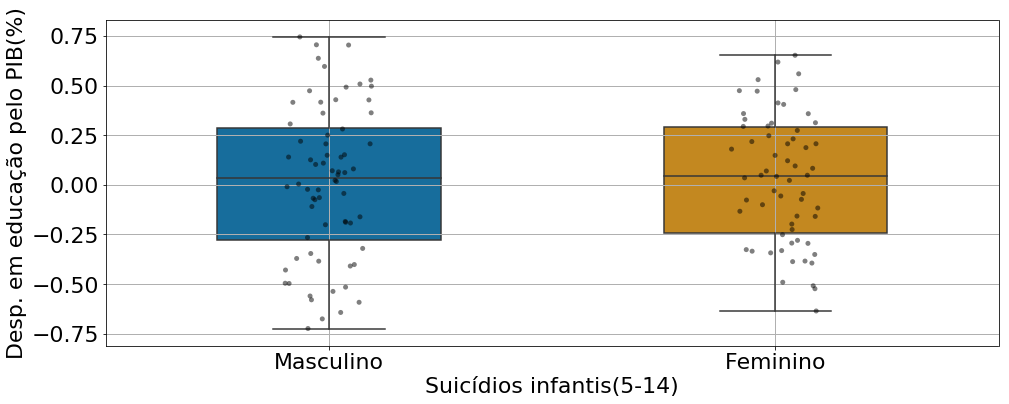

In [182]:
fig, ax = plt.subplots(figsize=(16, 6))

bplot=sns.boxplot(y='Desp. em educação pelo PIB(%)', x='Suicídios infantis(5-14)',
                 data=dfcorr, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='Desp. em educação pelo PIB(%)', x='Suicídios infantis(5-14)', 
                   data=dfcorr, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
ax.grid(b=True, which='major', linewidth=1)

In [218]:
dfEducation = dfMasculino.copy()
dfEducation = pd.merge(dfEducation, dfEducationGDP, on=['countrycode','year'])
dfEducation

,country,year,suicidio514,suicidio1524,suicidio2534,suicidio3554,suicidio5574,suicidio75,countrycode,SE.XPD.TOTL.GD.ZS
0,Albania,2000,0.266738,2.083333,7.327586,1.067521,5.636979,4.016064,ALB,3.28719
1,Albania,2001,1.865927,3.905655,10.654579,8.975097,5.593126,3.221234,ALB,3.34271
2,Albania,2002,0.313015,5.701969,11.149569,9.158971,6.561349,12.900313,ALB,3.05522
3,Albania,2003,1.277123,5.489780,4.380990,7.250205,7.939659,3.061193,ALB,3.06470
4,Albania,2004,0.330927,6.625565,7.845522,9.954897,4.826208,11.259359,ALB,3.17017
5,Albania,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,3.23791
6,Albania,2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,3.15794
7,Albania,2007,1.467906,4.508426,5.217573,7.659273,6.245539,18.883067,ALB,3.26756
8,Albania,2008,2.667032,3.836736,12.148911,9.811227,9.183459,4.486921,ALB,NaN
9,Albania,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,NaN


In [219]:
dfcorr = pd.DataFrame(columns=['country','5-14', '15-24', '25-34','35-54','55-74','75+'])

for name, group in dfEducation.groupby('country'):
    a = group['suicidio514'].corr(group['SE.XPD.TOTL.GD.ZS'])
    b = group['suicidio1524'].corr(group['SE.XPD.TOTL.GD.ZS'])
    c = group['suicidio2534'].corr(group['SE.XPD.TOTL.GD.ZS'])
    d = group['suicidio3554'].corr(group['SE.XPD.TOTL.GD.ZS'])
    e = group['suicidio5574'].corr(group['SE.XPD.TOTL.GD.ZS'])
    f = group['suicidio75'].corr(group['SE.XPD.TOTL.GD.ZS'])
    dfcorr = dfcorr.append(pd.Series([name,a,b,c,d,e,f], index=dfcorr.columns ),ignore_index=True)

dfcorr = dfcorr.melt(id_vars=["country"], 
        var_name="nome",
        value_name="correlacao")

dfcorr.rename(columns={'nome':'Suicídios de Homens', 'correlacao':'Desp. em educação pelo PIB(%)'},inplace=True)
dfcorr

,country,Suicídios de Homens,Desp. em educação pelo PIB(%)
0,Albania,5-14,-0.043211
1,Antigua and Barbuda,5-14,NaN
2,Argentina,5-14,-0.559917
3,Armenia,5-14,-0.064336
4,Aruba,5-14,NaN
5,Australia,5-14,0.071196
6,Austria,5-14,0.250495
7,Bahamas,5-14,NaN
8,Bahrain,5-14,NaN
9,Barbados,5-14,NaN


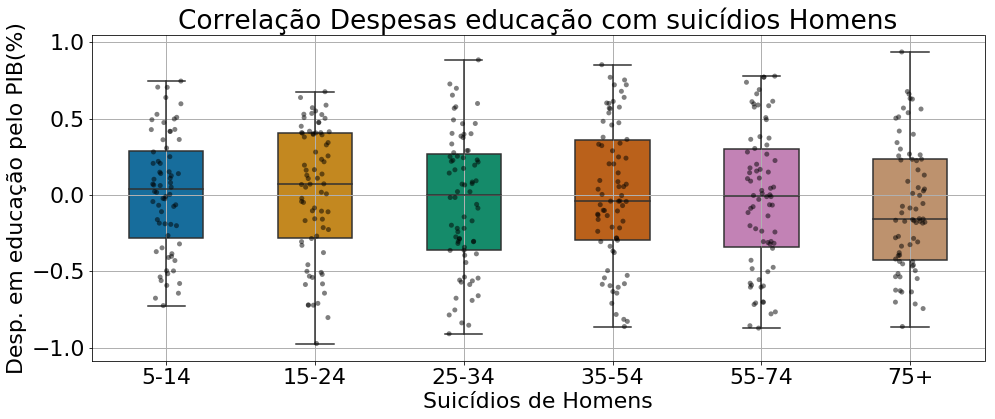

In [220]:
fig, ax = plt.subplots(figsize=(16, 6))

bplot=sns.boxplot(y='Desp. em educação pelo PIB(%)', x='Suicídios de Homens',
                 data=dfcorr, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='Desp. em educação pelo PIB(%)', x='Suicídios de Homens', 
                   data=dfcorr, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
ax.set_title("Correlação Despesas educação com suicídios Homens")
ax.grid(b=True, which='major', linewidth=1)

In [206]:
dfEducation = dfFeminino.copy()
dfEducation = pd.merge(dfEducation, dfEducationGDP, on=['countrycode','year'])
dfEducation

,country,year,suicidio514,suicidio1524,suicidio2534,suicidio3554,suicidio5574,suicidio75,countrycode,SE.XPD.TOTL.GD.ZS
0,Albania,2000,0.000000,2.273588,1.220504,1.505117,0.000000,5.291005,ALB,3.28719
1,Albania,2001,0.650711,3.316640,1.795566,3.241570,3.161239,4.232446,ALB,3.34271
2,Albania,2002,0.328030,5.073015,3.129401,3.998795,2.086463,2.109393,ALB,3.05522
3,Albania,2003,0.000000,4.934634,4.036943,3.405281,4.598899,12.222947,ALB,3.06470
4,Albania,2004,1.046372,6.843034,4.946288,4.342983,1.471735,5.885815,ALB,3.17017
5,Albania,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,3.23791
6,Albania,2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,3.15794
7,Albania,2007,0.000000,4.625018,4.356610,3.573151,4.070188,5.226117,ALB,3.26756
8,Albania,2008,0.406029,7.244461,4.927106,4.824392,3.091217,8.421904,ALB,NaN
9,Albania,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,NaN


In [208]:
dfcorr = pd.DataFrame(columns=['country','5-14', '15-24', '25-34','35-54','55-74','75+'])

for name, group in dfEducation.groupby('country'):
    a = group['suicidio514'].corr(group['SE.XPD.TOTL.GD.ZS'])
    b = group['suicidio1524'].corr(group['SE.XPD.TOTL.GD.ZS'])
    c = group['suicidio2534'].corr(group['SE.XPD.TOTL.GD.ZS'])
    d = group['suicidio3554'].corr(group['SE.XPD.TOTL.GD.ZS'])
    e = group['suicidio5574'].corr(group['SE.XPD.TOTL.GD.ZS'])
    f = group['suicidio75'].corr(group['SE.XPD.TOTL.GD.ZS'])
    dfcorr = dfcorr.append(pd.Series([name,a,b,c,d,e,f], index=dfcorr.columns ),ignore_index=True)

dfcorr = dfcorr.melt(id_vars=["country"], 
        var_name="nome",
        value_name="correlacao")

dfcorr.rename(columns={'nome':'Suicídios de Mulheres', 'correlacao':'Desp. em educação pelo PIB(%)'},inplace=True)
dfcorr

,country,Suicídios de Mulheres,Desp. em educação pelo PIB(%)
0,Albania,5-14,0.412820
1,Antigua and Barbuda,5-14,NaN
2,Argentina,5-14,0.180095
3,Armenia,5-14,0.207069
4,Aruba,5-14,NaN
5,Australia,5-14,0.358553
6,Austria,5-14,0.618562
7,Bahamas,5-14,NaN
8,Bahrain,5-14,NaN
9,Barbados,5-14,NaN


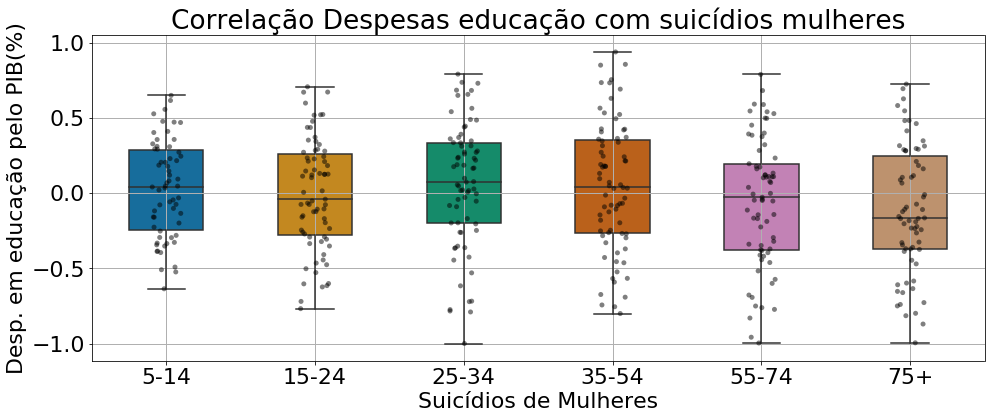

In [215]:
fig, ax = plt.subplots(figsize=(16, 6))
tips = sns.load_dataset("tips")

bplot=sns.boxplot(y='Desp. em educação pelo PIB(%)', x='Suicídios de Mulheres',
                 data=dfcorr, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='Desp. em educação pelo PIB(%)', x='Suicídios de Mulheres', 
                   data=dfcorr, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
ax.set_title("Correlação Despesas educação com suicídios mulheres")
ax.grid(b=True, which='major', linewidth=1)